# 0. Introduction
This notebook identifies the most common words in five large datasets covering the following themes: data engineering, data analytics, data science, software engineering and business analytics, as well as the most common words for the  five joined datasets as a whole. Datasets come in the form of csv documents, built from the webscraping of different webpages: GitHub, Documentation, Glassdoor and specific content sites (techical blogs and other similar sources). Some preprocess has already been put into the datasets, consisting mainly in the gathering and organizing of the obtained texts into one single csv file per category. The total amount of words in the five datasets is $3.204.121$<br>

We use a variety of libraries and packages including NLTK, collections, wordcloud, pandas, matplotlib and openpyxl. This report shows the steps that were followed, starting with the uploading of the datasets up until the writing of the excel files with the most common words per category. It includes the following sections:

0. Introduction<br>
1. Data Preprocess <br>
     1.1 Data Engineering Dataset<br>
     1.2 Software Engineering Dataset<br>
     1.3 Data Science Dataset<br>
     1.4 Data Analytics Dataset<br>
     1.5 Business Analytics Dataset<br>
2. Get Most Common Words<br>
3. Appendices<br>
     3.1 Dataframes of Clean Datasets<br>
     3.2 Write the Excel Files<br>
     3.2 Generate the Wordclouds






# 1. Data Preprocess

### 1.1 Data Engineering Dataset

In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('precision', 0)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/Teilur"

BusinessAnalyst.csv  DataEngineer.csv  SoftwareEngineer.csv
DataAnalyst.csv      DataScience.csv


In [4]:
f = open('/content/drive/My Drive/Teilur/DataEngineer.csv')
de = f.readlines()

In [5]:
de = [''.join(de)]
de = [','.join(de)]

In [6]:
de = str(de[0])

In [7]:
de = de.replace(","," ")
de = de.replace("("," ")
de = de.replace(")"," ")
de = de.replace("$"," ")
de = de.replace("-"," ")
de = de.replace("\n"," ")

In [8]:
def string_to_list(string):
    new_list = list(string.split(" "))
    return new_list

In [9]:
de = string_to_list(de)

In [10]:
lower_de = [x.lower() for x in de]
print(len(lower_de))

1472369


In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
               
pun_stop = punctuation + stopwords.words('english')

In [13]:
filter_de = [x for x in lower_de if x not in pun_stop]

In [14]:
filter_de = list(filter(lambda x: x.isalpha() and len(x) > 3, filter_de))

In [15]:
print(len(filter_de))

672656


### 1.2 Software Engineering Dataset

In [16]:
f = open('/content/drive/My Drive/Teilur/SoftwareEngineer.csv')
se = f.readlines()

In [17]:
se = [''.join(se)]
se = [','.join(se)]

In [18]:
se = str(se[0])

In [19]:
se = se.replace(","," ")
se = se.replace("("," ")
se = se.replace(")"," ")
se = se.replace("$"," ")
se = se.replace("-"," ")
se = se.replace("\n"," ")

In [20]:
se = string_to_list(se)

In [21]:
lower_se = [x.lower() for x in se]
print(len(lower_se))

1645508


In [22]:
filter_se = [x for x in lower_se if x not in pun_stop]

In [23]:
filter_se = list(filter(lambda x: x.isalpha() and len(x) > 3, filter_se))

In [24]:
print(len(filter_se))

761222


### 1.3 Data Science Dataset

In [25]:
f = open('/content/drive/My Drive/Teilur/DataScience.csv')
ds = f.readlines()

In [26]:
ds = [''.join(ds)]
ds = [','.join(ds)]


In [27]:
ds = str(ds[0])

In [28]:
ds = ds.replace(","," ")
ds = ds.replace("("," ")
ds = ds.replace(")"," ")
ds = ds.replace("$"," ")
ds = ds.replace("-"," ")
ds = ds.replace("\n"," ")

In [29]:
ds = string_to_list(ds)

In [30]:
lower_ds = [x.lower() for x in ds]
print(len(lower_ds))

399139


In [31]:
filter_ds = [x for x in lower_ds if x not in pun_stop]

In [32]:
filter_ds = list(filter(lambda x: x.isalpha() and len(x) > 3, filter_ds))

In [33]:
print(len(filter_ds))

184775


### 1.4 Data Analyst

In [34]:
f = open('/content/drive/My Drive/Teilur/DataAnalyst.csv')
da = f.readlines()

In [35]:
da = [''.join(da)]
da = [','.join(da)]


In [36]:
da = str(da[0])

In [37]:
da = da.replace(","," ")
da = da.replace("("," ")
da = da.replace(")"," ")
da = da.replace("$"," ")
da = da.replace("-"," ")

In [38]:
da = string_to_list(da)

In [39]:
lower_da = [x.lower() for x in da]
print(len(lower_da))

1141798


In [40]:
filter_da = [x for x in lower_da if x not in pun_stop]

In [41]:
filter_da = list(filter(lambda x: x.isalpha() and len(x) > 3, filter_da))

In [42]:
print(len(filter_da))

513055


### 1.5 Business Analyst

In [43]:
f = open('/content/drive/My Drive/Teilur/BusinessAnalyst.csv')
ba = f.readlines()

In [44]:
ba = [''.join(ba)]
ba = [','.join(ba)]


In [45]:
ba = str(ba[0])

In [46]:
ba = ba.replace(","," ")
ba = ba.replace("("," ")
ba = ba.replace(")"," ")
ba = ba.replace("$"," ")
ba = ba.replace("-"," ")
ba = ba.replace("\n"," ")

In [47]:
ba = string_to_list(ba)

In [48]:
lower_ba = [x.lower() for x in ba]
print(len(lower_ba))

2302347


In [49]:
filter_ba = [x for x in lower_ba if x not in pun_stop]

In [50]:
filter_ba = list(filter(lambda x: x.isalpha() and len(x) > 3, filter_ba))

In [51]:
print(len(filter_ba))

1072413


# 2. Get Most Common Words

In [52]:
from collections import Counter

In [53]:
def count(list, n):
    total = Counter(list)
    result = total.most_common(n)
    words = []
    for word in result:
        words.append(word[0])
    return words

def count_frequency(my_list):     
   count = {}
   for i in my_list:
    count[i] = count.get(i, 0) + 1
   return count

def count_and_sort(dict):
  return sorted(count_frequency(dict).items(), key=lambda x:x[1], reverse=True)

def to_df(list_of_tuples, string): #string is the category
  return pd.DataFrame(count_and_sort(list_of_tuples), columns =[string, 'Count'])

In [54]:
joined = filter_de + filter_da + filter_ds + filter_se + filter_ba

In [55]:
ba_freq = to_df(filter_ba,'BusinessAnalytics')
da_freq = to_df(filter_da,'DataAnalytics')
ds_freq = to_df(filter_ds,'DataScience')
de_freq = to_df(filter_de,'DataEngineering')
se_freq = to_df(filter_se,'SoftwareEngineering')
joined_freq = to_df(joined, 'Joined')

In [56]:
ba_freq.head(5)

,BusinessAnalytics,Count
0,business,26762
1,data,12845
2,analyst,9774
3,work,9672
4,management,7962


In [57]:
da_freq.head(5)

,DataAnalytics,Count
0,data,24182
1,business,7260
2,analyst,4953
3,work,4264
4,management,3228


In [58]:
ds_freq.head(5)

,DataScience,Count
0,data,8027
1,scientist,1630
2,business,1487
3,science,1452
4,work,1448


In [59]:
de_freq.head(5)

,DataEngineering,Count
0,data,23131
1,work,5858
2,engineer,5533
3,business,5140
4,software,4494


In [60]:
se_freq.head(5)

,SoftwareEngineering,Count
0,software,19154
1,development,12760
2,team,8961
3,technical,7989
4,design,7629


In [61]:
joined_freq.head(5)

,Joined,Count
0,data,74014
1,business,44605
2,software,28740
3,work,27175
4,development,24645


In [62]:
df_words = pd.DataFrame()

df_words['BusinessAnalytics'] = ba_freq['BusinessAnalytics']
df_words['CountBA'] =ba_freq['Count']

df_words['DataAnalytics'] = da_freq['DataAnalytics']
df_words['CountDA'] = da_freq['Count']

df_words['DataScience'] = ds_freq['DataScience']
df_words['CountDS'] = ds_freq['Count']

df_words['DataEngineering'] = de_freq['DataEngineering']
df_words['CountDE'] = de_freq['Count']

df_words['SoftwareEngineering'] = se_freq['SoftwareEngineering']
df_words['CountSE'] = se_freq['Count']

df_words['Joined'] = joined_freq['Joined']
df_words['CountJoined'] = joined_freq['Count']


In [63]:
df_words = df_words.dropna()

In [ ]:
n = df_words.shape[0]-500
df_words.drop(df_words.tail(n).index, inplace = True)

In [65]:
df_words

,BusinessAnalytics,CountBA,DataAnalytics,CountDA,DataScience,CountDS,DataEngineering,CountDE,SoftwareEngineering,CountSE,Joined,CountJoined
0,business,26762,data,24182,data,8027,data,23131,software,19154,data,74014
1,data,12845,business,7260,scientist,1630,work,5858,development,12760,business,44605
2,analyst,9774,analyst,4953,business,1487,engineer,5533,team,8961,software,28740
3,work,9672,work,4264,science,1452,business,5140,technical,7989,work,27175
4,management,7962,management,3228,work,1448,software,4494,design,7629,development,24645
...,...,...,...,...,...,...,...,...,...,...,...,...
495,improvements,465,want,211,azure,77,assigned,277,models,285,manufacturing,1343
496,daily,461,departments,211,detection,77,computing,276,solution,284,united,1341
497,clear,461,credit,211,class,77,accommodation,276,interface,283,defining,1334
498,resume,461,develops,210,others,77,cost,276,strategic,283,conduct,1333


In [66]:
count_ba = count(filter_ba, 500)
count_da = count(filter_da, 500)
count_ds = count(filter_ds, 500)
count_de = count(filter_de, 500)
count_se = count(filter_se, 500)
count_joined = count(joined, 500)

In [67]:
# Get the total number words in the dataset
len(joined)

3204121

# 3. Appendix
### 3.1 Dataframes of Clean Datasets



In [68]:
def create_substrings(x): # x is a list of words
  listoflists = []
  n = 0
  m = 10
  for i in range(int(len(x)/10)):
    listx = []
    for j in range(n,m):
      listx.append(x[j])
    listoflists.append(listx)
    n += 10
    m += 10
  return listoflists

In [69]:
de_list = create_substrings(filter_de)
se_list = create_substrings(filter_se)
ds_list = create_substrings(filter_ds)
da_list = create_substrings(filter_da)
ba_list = create_substrings(filter_ba)
joined_list = create_substrings(joined)

In [70]:
df_de = pd.DataFrame()
df_se = pd.DataFrame()
df_ds = pd.DataFrame()
df_da = pd.DataFrame()
df_ba = pd.DataFrame()
df_joined = pd.DataFrame()

In [71]:
df_de['data_engineer'] = de_list
df_se['software_engineer'] = se_list
df_ds['data_science'] = ds_list
df_da['data_analyst'] = da_list
df_ba['business_analyst'] = ba_list
df_joined['joined'] = joined_list


In [72]:
df_de['DataEngineer'] = df_de['data_engineer'].apply(lambda x: " ".join(x))
df_de.drop(df_de.columns[[0]], axis=1, inplace=True)
df_de.head()


,DataEngineer
0,size founded type ownership industry sector re...
1,sagence management advisory firm dedicated hel...
2,thinking sagence works leading institutions ac...
3,data assets analytics discover insights shorte...
4,currently work full time sagence sponsorship w...


In [73]:
df_se['SoftwareEngineer'] = df_se['software_engineer'].apply(lambda x: " ".join(x))
df_se.drop(df_se.columns[[0]], axis=1, inplace=True)
df_se.head()


,SoftwareEngineer
0,software development manager seattle experienc...
1,software simplifies solutions broad related st...
2,skills know inspire team achieve outstanding r...
3,record building leading strong teams talented ...
4,short skilled leader capable getting great thi...


In [74]:
df_ds['DataScience'] = df_ds['data_science'].apply(lambda x: " ".join(x))
df_ds.drop(df_ds.columns[[0]], axis=1, inplace=True)
df_ds.head()

,DataScience
0,size type ownership industry sector revenue py...
1,tableau seniority data scientist senior data s...
2,improving statistical models improve business ...
3,enrollment claims part broader analytics team ...
4,data solve address complex business problems e...


In [75]:
df_da['DataAnalyst'] = df_da['data_analyst'].apply(lambda x: " ".join(x))
df_da.drop(df_da.columns[[0]], axis=1, inplace=True)
df_da.head()

,DataAnalyst
0,size founded type ownership industry sector re...
1,immigration justice eager roll sleeves harness...
2,sifting complex datasets illuminate trends wor...
3,tackle pressing injustices looking hire bright...
4,strong data management skills demonstrated com...


In [76]:
df_ba['BusinessAnalyst'] = df_ba['business_analyst'].apply(lambda x: " ".join(x))
df_ba.drop(df_ba.columns[[0]], axis=1, inplace=True)
df_ba.head()

,BusinessAnalyst
0,index size founded type ownership industry sec...
1,analyst clinical logistics platform overview m...
2,cancer also world thinks working together push...
3,driving excellence improving year named hospit...
4,healthcare list great places work healthcare c...


In [77]:
df_joined['Joined'] = df_joined['joined'].apply(lambda x: " ".join(x))
df_joined.drop(df_joined.columns[[0]], axis=1, inplace=True)
df_joined.head()

,Joined
0,size founded type ownership industry sector re...
1,sagence management advisory firm dedicated hel...
2,thinking sagence works leading institutions ac...
3,data assets analytics discover insights shorte...
4,currently work full time sagence sponsorship w...


In [78]:
df_datasets = pd.concat([df_da,df_de,df_ds,df_se,df_ba,df_joined], axis=1)
df_datasets.dropna()

,DataAnalyst,DataEngineer,DataScience,SoftwareEngineer,BusinessAnalyst,Joined
0,size founded type ownership industry sector re...,size founded type ownership industry sector re...,size type ownership industry sector revenue py...,software development manager seattle experienc...,index size founded type ownership industry sec...,size founded type ownership industry sector re...
1,immigration justice eager roll sleeves harness...,sagence management advisory firm dedicated hel...,tableau seniority data scientist senior data s...,software simplifies solutions broad related st...,analyst clinical logistics platform overview m...,sagence management advisory firm dedicated hel...
2,sifting complex datasets illuminate trends wor...,thinking sagence works leading institutions ac...,improving statistical models improve business ...,skills know inspire team achieve outstanding r...,cancer also world thinks working together push...,thinking sagence works leading institutions ac...
3,tackle pressing injustices looking hire bright...,data assets analytics discover insights shorte...,enrollment claims part broader analytics team ...,record building leading strong teams talented ...,driving excellence improving year named hospit...,data assets analytics discover insights shorte...
4,strong data management skills demonstrated com...,currently work full time sagence sponsorship w...,data solve address complex business problems e...,short skilled leader capable getting great thi...,healthcare list great places work healthcare c...,currently work full time sagence sponsorship w...
...,...,...,...,...,...,...
18472,months flexibility duties reduce part time des...,search contact local robert half technology of...,bloomnet international floral wire service nap...,development engineers enjoy working agile fast...,multiple client coordinate activities time del...,search contact local robert half technology of...
18473,candidate committed transforming data readable...,applying openings work united applicants apply...,division broad range products services designe...,part amazon great technology powers commerce p...,support liaison designated personnel testing s...,applying openings work united applicants apply...
18474,closely program managers develop systems colle...,half equal opportunity employer clicking agree...,named stores retailers list national retail fe...,outwardly available part culture loves nothing...,adhere release demonstrate level subject matte...,half equal opportunity employer clicking agree...
18475,data data collection process multiple systems ...,july full technology half park public staffing...,award artificial intelligence category data ma...,delivers financial solutions audible royalties...,business requirements technical direction ensu...,july full technology half park public staffing...


### 3.2 Write the Excel Files

In [79]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
with pd.ExcelWriter('Words_Teilur.xlsx') as writer:
    df_words.to_excel(writer, sheet_name='MostCommonWords')

In [81]:
with pd.ExcelWriter('DataSets_Teilur.xlsx') as writer:
    df_da.to_excel(writer, sheet_name='DataSet_DA')
    df_de.to_excel(writer, sheet_name='DataSet_DE')
    df_ds.to_excel(writer, sheet_name='DataSet_DS')
    df_se.to_excel(writer, sheet_name='DataSet_SE')
    df_ba.to_excel(writer, sheet_name='DataSet_BA')
    df_joined.to_excel(writer, sheet_name='DataSet_Joined')

### 3.3 Generate the Wordclouds

In [82]:
from wordcloud import WordCloud, STOPWORDS

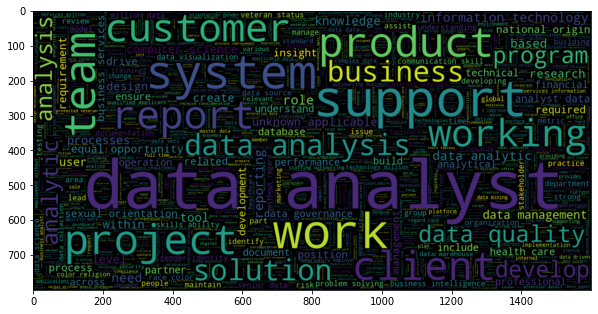

In [83]:
# plot the word cloud for the Data Analyst dataset
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(filter_da))
plt.imshow(wc, interpolation = 'bilinear')

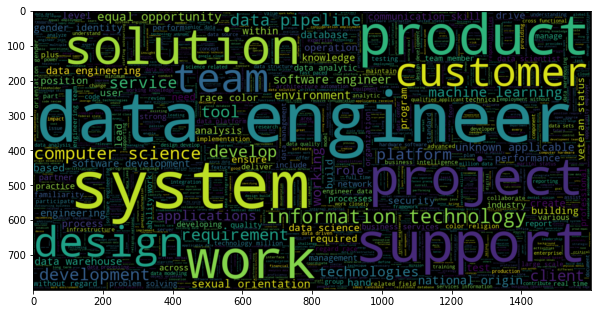

In [84]:
# plot the word cloud for the Data Engineer dataset
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(filter_de))
plt.imshow(wc, interpolation = 'bilinear')

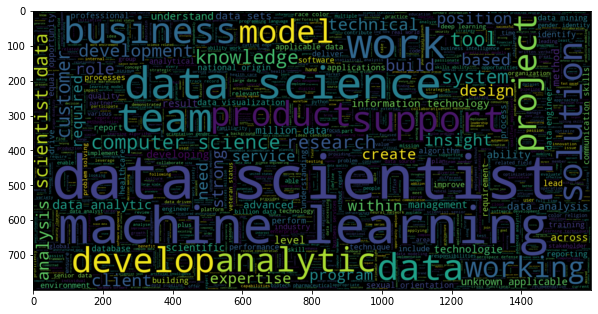

In [85]:
# plot the word cloud for the Data Scientist dataset
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(filter_ds))
plt.imshow(wc, interpolation = 'bilinear')

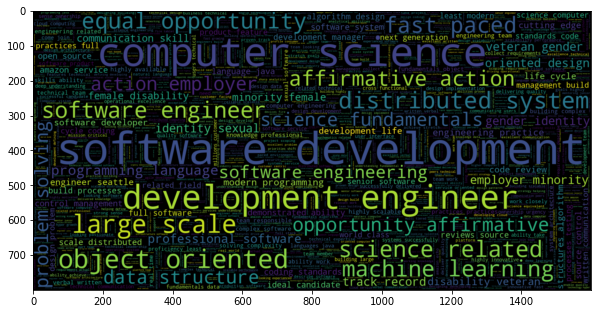

In [86]:
# plot the word cloud for the Software Engineer dataset
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(filter_se))
plt.imshow(wc, interpolation = 'bilinear')

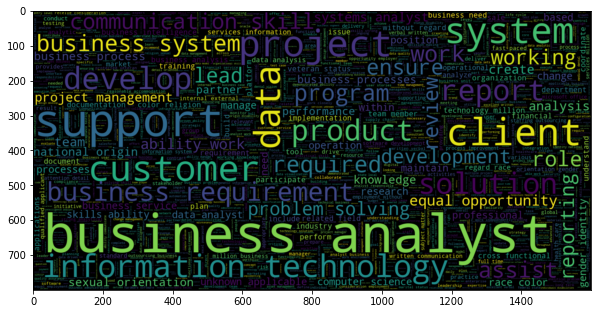

In [87]:
# plot the word cloud for the Business Analyst dataset
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(filter_ba))
plt.imshow(wc, interpolation = 'bilinear')

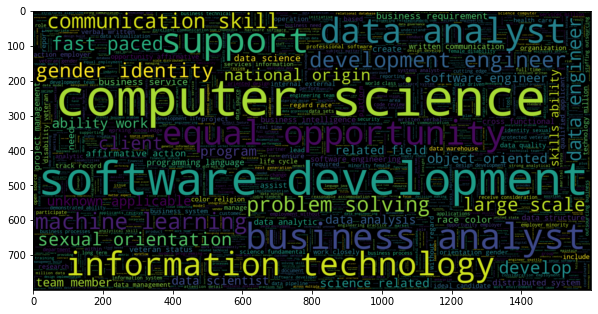

In [88]:
# plot the word cloud for the joined dataset
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(joined))
plt.imshow(wc, interpolation = 'bilinear')